In [1]:
import pyspark.sql.functions as F

In [2]:
import pyspark

In [3]:
sc = pyspark.SparkContext(appName="Pi")

In [4]:
import random

num_samples = 100000000

def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1

count = sc.parallelize(range(0, num_samples)).filter(inside).count()

pi = 4 * count / num_samples
print(pi)

sc.stop()

3.14159364


In [5]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

In [9]:
df = spark.read \
    .options(header=True, inferSchema=True) \
    .csv("my_data.csv")

In [10]:
df

DataFrame[a: int, b: int, c: int]

In [12]:
df.select('a').show()

+---+
|  a|
+---+
|  3|
|  2|
|  5|
|  8|
+---+



In [13]:
df.show()

+---+---+---+
|  a|  b|  c|
+---+---+---+
|  3|  2|  1|
|  2|  3|  1|
|  5|  8|  9|
|  8|  5|  9|
+---+---+---+



In [15]:
df.dtypes

[('a', 'int'), ('b', 'int'), ('c', 'int')]

In [17]:
df[df.a < 4].show()

+---+---+---+
|  a|  b|  c|
+---+---+---+
|  3|  2|  1|
|  2|  3|  1|
+---+---+---+



In [18]:
df[df['a'] < 4].show()

+---+---+---+
|  a|  b|  c|
+---+---+---+
|  3|  2|  1|
|  2|  3|  1|
+---+---+---+



In [20]:
df.groupby(['c']).agg({'a': 'sum', 'b': 'mean'}).show()

+---+------+------+
|  c|sum(a)|avg(b)|
+---+------+------+
|  1|     5|   2.5|
|  9|    13|   6.5|
+---+------+------+



In [23]:
df.withColumn('loga', F.log(df.a)).show()

+---+---+---+------------------+
|  a|  b|  c|              loga|
+---+---+---+------------------+
|  3|  2|  1|1.0986122886681096|
|  2|  3|  1|0.6931471805599453|
|  5|  8|  9|1.6094379124341003|
|  8|  5|  9|2.0794415416798357|
+---+---+---+------------------+



In [22]:
df

DataFrame[a: int, b: int, c: int]

In [24]:
# in pandas this is called merge()
df.join(df, on='c').show()

+---+---+---+---+---+
|  c|  a|  b|  a|  b|
+---+---+---+---+---+
|  1|  3|  2|  2|  3|
|  1|  3|  2|  3|  2|
|  1|  2|  3|  2|  3|
|  1|  2|  3|  3|  2|
|  9|  5|  8|  8|  5|
|  9|  5|  8|  5|  8|
|  9|  8|  5|  8|  5|
|  9|  8|  5|  5|  8|
+---+---+---+---+---+



In [29]:
# pivot table
df.groupby("c").pivot("b").sum("a").show()

+---+----+----+----+----+
|  c|   2|   3|   5|   8|
+---+----+----+----+----+
|  1|   3|   2|null|null|
|  9|null|null|   8|   5|
+---+----+----+----+----+



In [30]:
df.describe().show()

+-------+------------------+------------------+-----------------+
|summary|                 a|                 b|                c|
+-------+------------------+------------------+-----------------+
|  count|                 4|                 4|                4|
|   mean|               4.5|               4.5|              5.0|
| stddev|2.6457513110645903|2.6457513110645907|4.618802153517006|
|    min|                 2|                 2|                1|
|    max|                 8|                 8|                9|
+-------+------------------+------------------+-----------------+



array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>, <AxesSubplot:>]], dtype=object)

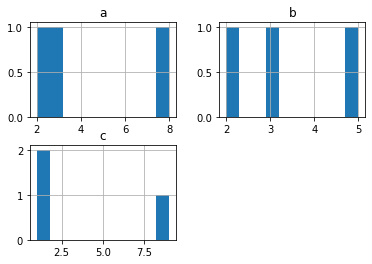

In [32]:
df.sample(False, 0.8).toPandas().hist()

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>, <AxesSubplot:>]], dtype=object)

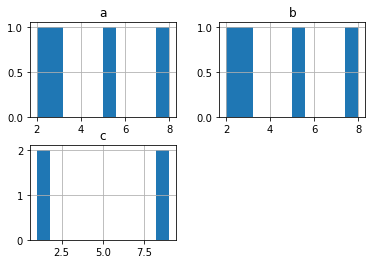

In [33]:
df.toPandas().hist()

In [34]:
df.createOrReplaceTempView('foo')
df2 = spark.sql('select * from foo')

In [35]:
df2.show()

+---+---+---+
|  a|  b|  c|
+---+---+---+
|  3|  2|  1|
|  2|  3|  1|
|  5|  8|  9|
|  8|  5|  9|
+---+---+---+

